In [22]:
import numpy as np
import pandas as pd

# to visualize all the column, run the below code
pd.options.display.max_columns = None
# to show all the records, use the below code
# pd.options.display.max_rows = None

## Fifa Worldcup - 2022 dataset.

You can find the dataset from [here](https://www.kaggle.com/datasets/sayanroy729/fifa-worldcup-2022-results).

Also you can directly use an url to read the dataset by using `pd.read_csv()` method. Check the below code cell.

In [23]:
# To get the details about the dataset, please visit
# https://www.kaggle.com/datasets/sayanroy729/fifa-worldcup-2022-results

url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vT3D_x_4DS6d51LKJ7ze1sxT5WpV5uiSVOFYHLwBiGru6vFyVv5h5-83AwFjxWYiWfCDjDAaarHAV-k/pub?gid=0&single=true&output=csv"
df = pd.read_csv(url)
df.columns

Index(['Sl. No', 'Match No.', 'Team', 'Against', 'Group', 'Goal',
       'Possession (%)', 'Inside Penalty Area', 'Outside Penalty Area',
       'Assists', 'Total Attempts', 'On Target', 'Off Target',
       'Target in Penalty', 'Target from Outside', 'Left Channel',
       'Left Inside Channel', 'Central Channel', 'Right Inside Channel',
       'Right Channel', 'Receptions MD', 'Receptions D',
       'Attempted Line Breaks', 'Completed Line Breaks',
       'Attempted Defensive Line Breaks', 'Completed Defensive Line Breaks',
       'Yellow Cards', 'Red Cards', 'Fouls Against', 'Offsides', 'Passes',
       'Passes Completed', 'Crosses', 'Crosses Completed', 'Corners',
       'Free Kicks', 'Penalties Scored', 'Pts'],
      dtype='object')

### `Q-1:` Use the football dataset. Find out the total percentages that each team made on target. Display the result as a python dictionary where the keys are the team list and the values are the percentage values. Round off the percentage values up to 2 decimal places.

*Help:*
- First, find out how many total teams are participated in this worldcup. For that, you can use `unique()` method on the column "Team" or "Against".
- Loop through the teams list that you have found in previous section, and then filter the dataset according to that. After filtering the dataset, find out total attempts sum and total on target sum.
- After getting these values, find out the percentage by total on target divided by total attempts and multiply by 100. And store to a python dictionary where the key will be the team name and the values will be the percentages.
- At the end,sort the dictionary by the values (not by the keys) and print the result.



**Sample Output:**
```bash
{'Costa Rica': 54.55,
 'Cameroon': 51.85,
 'Ecuador': 48.15,
 'Argentina': 46.99,
 'Brazil': 45.56,
 'England': 45.0,
 'Portugal': 40.32,
 'Ghana': 40.0,
 'Netherlands': 39.02,
 'Korea Republic': 36.73,
 'Australia': 36.0,
 'Mexico': 34.88,
 'Croatia': 34.78,
 'Germany': 34.33,
 'France': 32.97,
 'Spain': 32.69,
 'Belgium': 32.35,
 'Serbia': 32.26,
 'Iran': 31.43,
 'Uruguay': 31.25,
 'United States': 31.11,
 'Saudi Arabia': 31.03,
 'Senegal': 30.77,
 'Denmark': 30.56,
 'Switzerland': 30.56,
 'Japan': 30.23,
 'Wales': 29.17,
 'Qatar': 28.57,
 'Morocco': 28.3,
 'Tunisia': 26.67,
 'Poland': 25.0,
 'Canada': 17.65}
```

In [24]:
df['Team'].unique()

array(['Qatar', 'Ecuador', 'England', 'Iran', 'Senegal', 'Netherlands',
       'United States', 'Wales', 'Argentina', 'Saudi Arabia', 'Denmark',
       'Tunisia', 'Mexico', 'Poland', 'France', 'Australia', 'Morocco',
       'Croatia', 'Germany', 'Japan', 'Spain', 'Costa Rica', 'Belgium',
       'Canada', 'Switzerland', 'Cameroon', 'Uruguay', 'Korea Republic',
       'Portugal', 'Ghana', 'Brazil', 'Serbia'], dtype=object)

In [25]:
def calculate_percentages(df):
    # Find the total number of teams
    total_teams = len(df['Team'].unique())
    # print(total_teams)

    # Initialize an empty dictionary to store the percentages
    percentages = {}
    for team in df['Team'].unique():
        # Filter the dataset for the current team
        team_data = df[df['Team'] == team]
        # print(team_data)
        # Calculate the total attempts and total on-target attempts
        total_attempts = team_data['Total Attempts'].sum()
        total_on_target = team_data['On Target'].sum()
        # Calculate the percentage of on-target attempts
        percentage = (total_on_target / total_attempts) * 100
        # Round the percentage to 2 decimal places
        percentage = round(percentage, 2)
        # Store the percentage in the dictionary
        percentages[team] = percentage
        # Sort the dictionary by values in descending order
    sorted_percentages = dict(sorted(percentages.items(), key=lambda item: item[1], reverse=True))
    return sorted_percentages

calculate_percentages(df)

{'Costa Rica': 54.55,
 'Cameroon': 51.85,
 'Ecuador': 48.15,
 'Argentina': 46.15,
 'Brazil': 45.56,
 'England': 45.0,
 'Portugal': 40.32,
 'Ghana': 40.0,
 'Netherlands': 39.02,
 'Korea Republic': 36.73,
 'Australia': 36.0,
 'Mexico': 34.88,
 'France': 34.65,
 'Germany': 34.33,
 'Croatia': 33.73,
 'Spain': 32.69,
 'Belgium': 32.35,
 'Serbia': 32.26,
 'Iran': 31.43,
 'Uruguay': 31.25,
 'United States': 31.11,
 'Saudi Arabia': 31.03,
 'Senegal': 30.77,
 'Denmark': 30.56,
 'Switzerland': 30.56,
 'Japan': 30.23,
 'Wales': 29.17,
 'Qatar': 28.57,
 'Morocco': 28.33,
 'Tunisia': 26.67,
 'Poland': 25.0,
 'Canada': 17.65}

### `Q-2:` Find out how many times the teams are played in this Fifa Worldcup-2022. On top of this, find out the ranks of the teams.

Note: The `DataFrame.rank()` method takes an optiinal parameter named `method`. This parameter takes different values, but one of them is `average` which is by-default. So, when you do the rank, you will get some 2.5 like floating values. But if you change the value as `first`, then you will get in integers but the datatype will be float. So, try with `method="first"` parameter.

In [26]:
df['Team'].value_counts()

,count
Team,
Morocco,7
Croatia,7
Argentina,7
France,7
England,5
Brazil,5
Netherlands,5
Portugal,5
Poland,4


In [27]:
pd.DataFrame(df['Team'].value_counts()).rank(method='first')

,count
Team,
Morocco,29.0
Croatia,30.0
Argentina,31.0
France,32.0
England,25.0
Brazil,26.0
Netherlands,27.0
Portugal,28.0
Poland,17.0


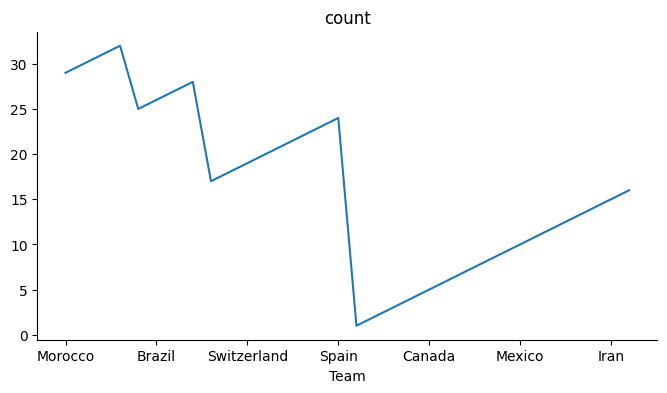

In [28]:
from matplotlib import pyplot as plt
_df_1['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

### `Q-3:` Find out these below topics:
- The information about the Fifa worldcup dataset.
- The description about the Fifa worldcup dataset
- Check is there any missing values, if there is any missing values, fill that value with the average value for that particular column.
- Drop all the duplicate rows permanently.
- Drop the columns: "Sl No", "Match No.", "Red Cards" and "Pts" permanently.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Sl. No                           128 non-null    int64 
 1   Match No.                        128 non-null    int64 
 2   Team                             128 non-null    object
 3   Against                          128 non-null    object
 4   Group                            128 non-null    object
 5   Goal                             128 non-null    int64 
 6   Possession (%)                   128 non-null    int64 
 7   Inside Penalty Area              128 non-null    int64 
 8   Outside Penalty Area             128 non-null    int64 
 9   Assists                          128 non-null    int64 
 10  Total Attempts                   128 non-null    int64 
 11  On Target                        128 non-null    int64 
 12  Off Target                       128

In [30]:
df.describe()

,Sl. No,Match No.,Goal,Possession (%),Inside Penalty Area,Outside Penalty Area,Assists,Total Attempts,On Target,Off Target,Target in Penalty,Target from Outside,Left Channel,Left Inside Channel,Central Channel,Right Inside Channel,Right Channel,Receptions MD,Receptions D,Attempted Line Breaks,Completed Line Breaks,Attempted Defensive Line Breaks,Completed Defensive Line Breaks,Yellow Cards,Red Cards,Fouls Against,Offsides,Passes,Passes Completed,Crosses,Crosses Completed,Corners,Free Kicks,Penalties Scored,Pts
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,64.500000,32.500000,1.343750,43.476562,1.203125,0.117188,0.914062,11.257812,4.007812,4.835938,6.914062,4.343750,13.562500,4.671875,4.906250,4.648438,12.234375,92.703125,12.453125,169.281250,109.476562,14.812500,8.265625,1.726562,0.023438,12.320312,1.976562,502.859375,430.929688,19.523438,4.898438,4.468750,14.250000,0.335938,1.429688
std,37.094474,18.545539,1.342448,11.442403,1.324270,0.322907,1.150333,5.406683,2.588576,2.610630,3.998085,2.733397,6.901729,2.886595,3.080131,2.936573,6.176517,29.440547,18.152399,34.120661,30.776298,7.230458,5.101311,1.514834,0.151883,4.691983,1.731891,160.160487,160.893724,8.596799,3.520111,2.774852,4.712189,0.941412,1.389973
min,1.000000,1.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,32.000000,0.000000,56.000000,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,225.000000,156.000000,4.000000,0.000000,0.000000,5.000000,0.000000,0.000000
25%,32.750000,16.750000,0.000000,35.000000,0.000000,0.000000,0.000000,7.750000,2.000000,3.000000,4.000000,3.000000,8.000000,2.000000,3.000000,3.000000,8.000000,72.750000,7.000000,149.500000,87.750000,10.000000,5.000000,1.000000,0.000000,9.000000,1.000000,398.250000,323.250000,13.000000,3.000000,2.000000,11.000000,0.000000,0.000000
50%,64.500000,32.500000,1.000000,45.000000,1.000000,0.000000,1.000000,10.000000,4.000000,4.000000,6.000000,4.000000,12.000000,4.500000,4.000000,4.000000,11.000000,93.000000,9.000000,170.500000,106.000000,15.000000,8.000000,2.000000,0.000000,12.000000,2.000000,495.500000,419.000000,19.000000,4.000000,4.000000,14.000000,0.000000,1.000000
75%,96.250000,48.250000,2.000000,51.000000,2.000000,0.000000,1.000000,14.000000,6.000000,6.000000,9.000000,5.000000,18.000000,7.000000,6.250000,6.000000,16.250000,111.250000,14.000000,188.000000,129.000000,20.000000,11.000000,2.000000,0.000000,15.000000,3.000000,589.500000,519.750000,24.000000,6.000000,6.000000,17.000000,0.000000,3.000000
max,128.000000,64.000000,7.000000,78.000000,7.000000,1.000000,6.000000,32.000000,13.000000,17.000000,24.000000,15.000000,36.000000,13.000000,16.000000,19.000000,29.000000,186.000000,192.000000,259.000000,192.000000,40.000000,27.000000,8.000000,1.000000,30.000000,10.000000,1070.000000,994.000000,53.000000,25.000000,14.000000,30.000000,5.000000,3.000000


In [31]:
df.isnull().sum()

,0
Sl. No,0
Match No.,0
Team,0
Against,0
Group,0
Goal,0
Possession (%),0
Inside Penalty Area,0
Outside Penalty Area,0
Assists,0


In [32]:
df.drop_duplicates(inplace=True)

In [33]:
df.drop(columns=['Sl. No', 'Match No.', 'Red Cards', 'Pts'], inplace=True)


In [34]:
df.head()

,Team,Against,Group,Goal,Possession (%),Inside Penalty Area,Outside Penalty Area,Assists,Total Attempts,On Target,Off Target,Target in Penalty,Target from Outside,Left Channel,Left Inside Channel,Central Channel,Right Inside Channel,Right Channel,Receptions MD,Receptions D,Attempted Line Breaks,Completed Line Breaks,Attempted Defensive Line Breaks,Completed Defensive Line Breaks,Yellow Cards,Fouls Against,Offsides,Passes,Passes Completed,Crosses,Crosses Completed,Corners,Free Kicks,Penalties Scored
0,Qatar,Ecuador,A,0,40,0,0,0,5,0,5,2,3,15,0,3,1,9,45,5,159,100,6,4,4,15,3,453,387,10,5,1,19,0
1,Ecuador,Qatar,A,2,46,2,0,1,5,5,2,4,1,8,7,6,4,6,55,10,159,103,6,4,2,15,4,484,419,26,10,3,17,1
2,England,Iran,B,6,69,6,0,6,13,7,3,10,3,11,5,2,3,11,72,15,133,94,8,6,0,9,2,810,733,29,9,8,16,0
3,Iran,England,B,2,20,2,0,1,8,3,4,6,2,3,0,3,1,1,34,1,56,19,1,1,2,14,2,232,156,11,3,0,10,1
4,Senegal,Netherlands,A,0,39,0,0,0,15,4,7,8,7,12,4,2,4,13,101,12,143,86,6,6,2,13,2,391,326,22,8,6,14,0


###`Q-4:` Do these below operations:
- Find out the rank based on the "Team" column and save the result by adding a new column named "Rank".
- Change the datatype of this column to integer by using `np.int16`
- Set the index of the DataFrame by using this "Rank" column permanently.
- After that, sort the dataframe based on the "Rank" index.

In [37]:
df['Rank'] = df['Team'].rank(method='first', ascending=True).astype(np.int16)
df.set_index('Rank', inplace=True)
df.sort_index(inplace=True)
df.head()

,Team,Against,Group,Goal,Possession (%),Inside Penalty Area,Outside Penalty Area,Assists,Total Attempts,On Target,Off Target,Target in Penalty,Target from Outside,Left Channel,Left Inside Channel,Central Channel,Right Inside Channel,Right Channel,Receptions MD,Receptions D,Attempted Line Breaks,Completed Line Breaks,Attempted Defensive Line Breaks,Completed Defensive Line Breaks,Yellow Cards,Fouls Against,Offsides,Passes,Passes Completed,Crosses,Crosses Completed,Corners,Free Kicks,Penalties Scored
Rank,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Argentina,Saudi Arabia,C,1,51,1,0,0,14,6,6,10,4,12,4,5,8,18,91,27,195,127,10,8,0,7,10,593,525,36,15,9,21,1
2,Argentina,Mexico,C,2,50,1,1,2,5,2,3,2,3,10,6,2,4,12,89,2,150,100,10,5,1,15,2,533,464,14,2,4,23,0
3,Argentina,Poland,C,2,67,1,1,2,25,13,8,10,15,25,8,7,10,26,150,36,141,126,20,16,1,11,0,862,814,22,5,9,5,0
4,Argentina,Australia,C,2,53,2,0,1,14,5,7,11,3,15,6,11,2,17,127,8,181,135,16,8,0,8,4,711,635,6,1,1,15,0
5,Argentina,Netherlands,C,2,44,2,0,1,15,6,8,5,10,7,7,13,6,17,104,7,203,122,24,8,8,18,2,603,511,16,4,8,30,5


## Questions on Titanic dataset.

You can get the dataset from [here](https://www.kaggle.com/competitions/titanic). This is the competition page on Kaggle. To download the dataset from here, I guess you have to register for the compition. So, do so and then download the dataset.

Also, for now you can use this url to read the dataset like before:
- dataset 1: https://docs.google.com/spreadsheets/d/e/2PACX-1vQjh5HzZ1N0SU7ME9ZQRzeVTaXaGsV97rU8R7eAcg53k27GTstJp9cRUOfr55go1GRRvTz1NwvyOnuh/pub?gid=1562145139&single=true&output=csv
- dataset 2: https://docs.google.com/spreadsheets/d/e/2PACX-1vQcPvQsSC9aNFogvbUG08nu0bGHlOclGYaOlhND_LE5Ff7ZnHQ5VYzAgpyT5XNklgiT54SsNgHePsUa/pub?gid=1656109608&single=true&output=csv

### `Q-5:` Do the below tasks:
1. With dataset 1, drop those records which only have missing values of the "Age" column permanently.

2. With the dataset 2, fill the missing values with 20 to the only "Age" column permanently.

In [39]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQjh5HzZ1N0SU7ME9ZQRzeVTaXaGsV97rU8R7eAcg53k27GTstJp9cRUOfr55go1GRRvTz1NwvyOnuh/pub?gid=1562145139&single=true&output=csv')
df.dropna(subset=['Age'], inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [40]:
df = pd.read_csv('https://www.google.com/url?q=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2Fe%2F2PACX-1vQcPvQsSC9aNFogvbUG08nu0bGHlOclGYaOlhND_LE5Ff7ZnHQ5VYzAgpyT5XNklgiT54SsNgHePsUa%2Fpub%3Fgid%3D1656109608%26single%3Dtrue%26output%3Dcsv')
df['Age'].fillna(20, inplace=True)
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,20.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,20.0,0,0,359309,8.0500,NaN,S


## Questions on IPL wala dataset

matches dataset = https://drive.google.com/file/d/1yKVUuexl6lIKuFQy7uIPgDgXhJ0L4SIg/view?usp=share_link

Code to directly use in colab
```
ipl_matches = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRy2DUdUbaKx_Co9F0FSnIlyS-8kp4aKv_I0-qzNeghiZHAI_hw94gKG22XTxNJHMFnFVKsO4xWOdIs/pub?gid=1655759976&single=true&output=csv"

```




###`Q-6:` Make a dataframe of each team in IPL with details like - Team Name, Matches Played, Win%, Home Win%, Away Win%.
Show sorted dataframe on Win%

Replace old team name as new name before performing any tasks.
```
Delhi Daredevils ->Delhi Capitals
Kings XI Punjab -> Punjab Kings
Rising Pune Supergiants -> Rising Pune Supergiant
```

Note: Team1 represents Home team. Exclude not result matches.


In [73]:
ipl = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRy2DUdUbaKx_Co9F0FSnIlyS-8kp4aKv_I0-qzNeghiZHAI_hw94gKG22XTxNJHMFnFVKsO4xWOdIs/pub?gid=1655759976&single=true&output=csv"
ipl = pd.read_csv(ipl)
ipl.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [74]:
ipl['Team1'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [75]:
team_name_replacements = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Kings XI Punjab': 'Punjab Kings',
    'Rising Pune Supergiants': 'Rising Pune Supergiant'
}

ipl[['Team1', 'Team2', 'WinningTeam']] = ipl[['Team1', 'Team2', 'WinningTeam']].replace(team_name_replacements)

# Step 2: Exclude matches with no result
ipl = ipl[ipl['WinningTeam'].notna()]

# Step 3: Calculate the required statistics for each team
teams = pd.concat([ipl['Team1'], ipl['Team2']]).unique()  # Use pd.concat to combine Series

team_stats = []

for team in teams:
    matches_played = ipl[(ipl['Team1'] == team) | (ipl['Team2'] == team)].shape[0]
    matches_won = ipl[ipl['WinningTeam'] == team].shape[0]
    home_matches_played = ipl[ipl['Team1'] == team].shape[0]
    home_matches_won = ipl[(ipl['Team1'] == team) & (ipl['WinningTeam'] == team)].shape[0]
    away_matches_played = ipl[ipl['Team2'] == team].shape[0]
    away_matches_won = ipl[(ipl['Team2'] == team) & (ipl['WinningTeam'] == team)].shape[0]

    win_percent = (matches_won / matches_played) * 100 if matches_played > 0 else 0
    home_win_percent = (home_matches_won / home_matches_played) * 100 if home_matches_played > 0 else 0
    away_win_percent = (away_matches_won / away_matches_played) * 100 if away_matches_played > 0 else 0

    team_stats.append({
        'Team Name': team,
        'Matches Played': matches_played,
        'Win%': win_percent,
        'Home Win%': home_win_percent,
        'Away Win%': away_win_percent
    })

# Step 4: Create DataFrame from the team statistics
df_team_stats = pd.DataFrame(team_stats)

# Step 5: Sort the DataFrame based on Win%
df_team_stats.sort_values(by='Win%', ascending=False, inplace=True)
df_team_stats.reset_index(drop=True, inplace=True)
df_team_stats

,Team Name,Matches Played,Win%,Home Win%,Away Win%
0,Gujarat Titans,16,75.000000,57.142857,88.888889
1,Lucknow Super Giants,15,60.000000,87.500000,28.571429
2,Chennai Super Kings,208,58.173077,58.558559,57.731959
3,Mumbai Indians,231,56.709957,58.035714,55.462185
4,Kolkata Knight Riders,223,51.121076,53.333333,49.152542
5,Rajasthan Royals,190,50.526316,55.056180,46.534653
6,Rising Pune Supergiant,30,50.000000,50.000000,50.000000
7,Sunrisers Hyderabad,152,49.342105,52.173913,46.987952
8,Royal Challengers Bangalore,223,48.878924,49.593496,48.000000
9,Delhi Capitals,222,46.396396,46.902655,45.871560


###`Q-7:` Venues with most "no result" matches.

In [76]:
no_result_matches = ipl[ipl['WinningTeam'].isna()]  # Assuming 'NaN' indicates 'No Result'

# Step 2: Count the number of "No Result" matches by Venue
no_result_by_venue = no_result_matches['Venue'].value_counts()
no_result_by_venue

,count
Venue,


###`Q-8:` Player with most appearance in final match.

`Team1Players` and `Team2Players` have all players name. It is not a list of players name instead it is str. So handle it as string.

Hint: split and strip will help; Make a series of all players in final and do value counts


In [77]:
# Step 1: Filter for Final matches
final_matches = ipl[ipl['MatchNumber'] == 'Final']

# Step 2: Extract all players from Team1Players and Team2Players

# Convert to string first and handle NaN values
team1_players = final_matches['Team1Players'].dropna().astype(str).str.split(', ').explode().str.strip()
team2_players = final_matches['Team2Players'].dropna().astype(str).str.split(', ').explode().str.strip()

# Combine all players into one series using pd.concat
all_players = pd.concat([team1_players, team2_players])

# Step 3: Count the number of appearances for each player
player_appearances = all_players.value_counts()

# Step 4: Get the player with the most appearances
player_with_most_appearances = player_appearances.idxmax()
most_appearances_count = player_appearances.max()
most_appearances_count

10

###`Q-9:` IPL Point Table

Make a function `point_table` which take `season` as parameter and show points table in non-ascendng order of points and in ascending order of team name.

For winning - 2 Ponits;
For loosing - 0 Point
For not result both team gets 1 points.

Make dataframe which will have
`TeamName` `MatchesPlayed` `MatchesWon` `NoResult` `Points`
make `TeamName` as index.

```
season parametr should be one of these->
['2022', '2021', '2020/21', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2009/10', '2009', '2007/08']
```


Output of two Top 2 in season 2022
```
TeamName    MatchesPlayed	MatchesWon	NoResult	Points

Gujarat Titans	    16	   12	       0	     24
Rajasthan Royals	  17	   10	       0	     20

```

In [88]:

def point_table(season):

    season_matches = ipl[ipl['Season'] == season]

    # Replace old team names with new names
    team_name_replacements = {
        'Delhi Daredevils': 'Delhi Capitals',
        'Kings XI Punjab': 'Punjab Kings',
        'Rising Pune Supergiants': 'Rising Pune Supergiant'
    }
    season_matches[['Team1', 'Team2', 'WinningTeam']] = season_matches[['Team1', 'Team2', 'WinningTeam']].replace(team_name_replacements)

    # Calculate matches played by each team
    matches_played = pd.concat([season_matches['Team1'], season_matches['Team2']]).value_counts()

    # Calculate matches won by each team
    matches_won = season_matches['WinningTeam'].value_counts()

    # Calculate no-result matches for each team
    no_result_team1 = season_matches[season_matches['WinningTeam'].isna()]['Team1'].value_counts()
    no_result_team2 = season_matches[season_matches['WinningTeam'].isna()]['Team2'].value_counts()
    no_result = no_result_team1.add(no_result_team2, fill_value=0)

    # Calculate points (2 points for a win, 1 point for no result)
    points = matches_won * 2 + no_result

    points_table = pd.DataFrame({
        'MatchesPlayed': matches_played,
        'MatchesWon': matches_won,
        'NoResult': no_result,
        'Points': points
    }).fillna(0)  # Fill NaN values with 0

    # Convert columns to integer type for cleaner output
    points_table = points_table.astype(int)

    # Sort the table by Points (descending) then by the index (ascending)
    points_table.sort_values(by=['Points'], ascending=[False], inplace=True)
    points_table.sort_index(ascending=True, inplace=True) # Sort by the index which contains team names

    return points_table

point_table('2022')

<ipython-input-88-6c0dd7088177>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_matches[['Team1', 'Team2', 'WinningTeam']] = season_matches[['Team1', 'Team2', 'WinningTeam']].replace(team_name_replacements)


,MatchesPlayed,MatchesWon,NoResult,Points
Chennai Super Kings,14,4,0,0
Delhi Capitals,14,7,0,0
Gujarat Titans,16,12,0,0
Kolkata Knight Riders,14,6,0,0
Lucknow Super Giants,15,9,0,0
Mumbai Indians,14,4,0,0
Punjab Kings,14,7,0,0
Rajasthan Royals,17,10,0,0
Royal Challengers Bangalore,16,9,0,0
Sunrisers Hyderabad,14,6,0,0


###`Q-10:` IPL Point Table cont.
Extend the above IPL Point Table with an extra column as `SeasonPosition`

Team below top 4 after sorting on `Points` and then on `TeamName` Will have same `SeasonPosition` as there rank. use rank function.

Teams in Top four will have `SeasonPosition` as:
```
    'Winner' - Team won final
    'Runner' - Team lost Final
    3 - Losing Team in Qualifier2
    4 - Losing Team in Eliminator
```

For changing value of pariticular cell use `df.at[row_index, col_label] = value`

Output of two Top 2 in season 2022. Your result should have all teams.
```
TeamName    MatchesPlayed	MatchesWon	NoResult	Points   SeasonPosition

Gujarat Titans	    16	   12	       0	     24         Winner
Rajasthan Royals	  17	   10	       0	     20         Runner

```

Note: If you try to chnage value of view of any dataframe a warnig will be shown. To avoid it, make a copy of the dataframe you want to change in by `df.copy()`

In [93]:
ipl_copy = ipl.copy()

In [110]:
def point_table(season):

    # Filter matches for the given season
    season_matches = ipl_copy[ipl_copy['Season'] == season]

    season_matches[['Team1', 'Team2', 'WinningTeam']] = season_matches[['Team1', 'Team2', 'WinningTeam']]

    # Calculate matches played by each team
    matches_played = pd.concat([season_matches['Team1'], season_matches['Team2']]).value_counts()

    # Calculate matches won by each team
    matches_won = season_matches['WinningTeam'].value_counts()

    # Calculate no-result matches for each team
    no_result_team1 = season_matches[season_matches['WinningTeam'].isna()]['Team1'].value_counts()
    no_result_team2 = season_matches[season_matches['WinningTeam'].isna()]['Team2'].value_counts()
    no_result = no_result_team1.add(no_result_team2, fill_value=0)

    # Calculate points (2 points for a win, 1 point for no result)
    points = matches_won * 2 + no_result

    # Create the points table DataFrame
    points_table = pd.DataFrame({
        'MatchesPlayed': matches_played,
        'MatchesWon': matches_won,
        'NoResult': no_result,
        'Points': points
    }).fillna(0)

    # Sort the table by Points (descending) and TeamName (ascending)
    points_table.sort_values(by=['Points', ], ascending=[False, ], inplace=True)

    # Add SeasonPosition column
    points_table['SeasonPosition'] = points_table['Points'].rank(method='dense', ascending=False).astype(int)

    # Identify top 4 positions
    final_match = season_matches[season_matches['MatchNumber'] == 'Final']
    qualifier2_match = season_matches[season_matches['MatchNumber'] == 'Qualifier 2']
    eliminator_match = season_matches[season_matches['MatchNumber'] == 'Eliminator']

    winner = final_match['WinningTeam'].values[0]
    runner = final_match[['Team1', 'Team2']].apply(lambda x: x[1] if x[0] == winner else x[0], axis=1).values[0]
    third = qualifier2_match[['Team1', 'Team2']].apply(lambda x: x[1] if x[0] == qualifier2_match['WinningTeam'].values[0] else x[0], axis=1).values[0]
    fourth = eliminator_match[['Team1', 'Team2']].apply(lambda x: x[1] if x[0] == eliminator_match['WinningTeam'].values[0] else x[0], axis=1).values[0]

    # Set positions in the points table
    points_table_copy = points_table.copy()  # To avoid SettingWithCopyWarning
    points_table_copy.at[winner, 'SeasonPosition'] = 'Winner'
    points_table_copy.at[runner, 'SeasonPosition'] = 'Runner'
    points_table_copy.at[third, 'SeasonPosition'] = 3
    points_table_copy.at[fourth, 'SeasonPosition'] = 4

    return points_table_copy

point_table('2022')

<ipython-input-110-af26518bb586>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_matches[['Team1', 'Team2', 'WinningTeam']] = season_matches[['Team1', 'Team2', 'WinningTeam']]
<ipython-input-110-af26518bb586>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  runner = final_match[['Team1', 'Team2']].apply(lambda x: x[1] if x[0] == winner else x[0], axis=1).values[0]
<ipython-input-110-af26518bb586>:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent 

,MatchesPlayed,MatchesWon,NoResult,Points,SeasonPosition
Chennai Super Kings,14,4,0.0,0.0,1
Delhi Capitals,14,7,0.0,0.0,1
Gujarat Titans,16,12,0.0,0.0,Winner
Kolkata Knight Riders,14,6,0.0,0.0,1
Lucknow Super Giants,15,9,0.0,0.0,4
Mumbai Indians,14,4,0.0,0.0,1
Punjab Kings,14,7,0.0,0.0,1
Rajasthan Royals,17,10,0.0,0.0,Runner
Royal Challengers Bangalore,16,9,0.0,0.0,3
Sunrisers Hyderabad,14,6,0.0,0.0,1


## None: Few Questions I may misunderstood, If you want to correct then correct me